**Importing Stuff**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import svm
from sklearn.model_selection import train_test_split
import h5py
from functools import reduce
import os
from PIL import Image

**Generate Random DataSet with given range for 2 classes**

In [4]:
def generate_random_dataset(size,Zerox,Zeroy,Onex,Oney):
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(Zerox[0], Zerox[1]), 1))
        y.append(np.round(random.uniform(Zeroy[0], Zeroy[1]), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(Onex[0], Onex[1]), 2))
        y.append(np.round(random.uniform(Oney[0], Oney[1]), 2))
        target.append(1)
        if len(Oney) > 2:
            x.append(np.round(random.uniform(Onex[2], Onex[3]), 2))
            y.append(np.round(random.uniform(Oney[2], Oney[3]), 2))
            target.append(1)
        
        
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

Generate and show a randon dataset

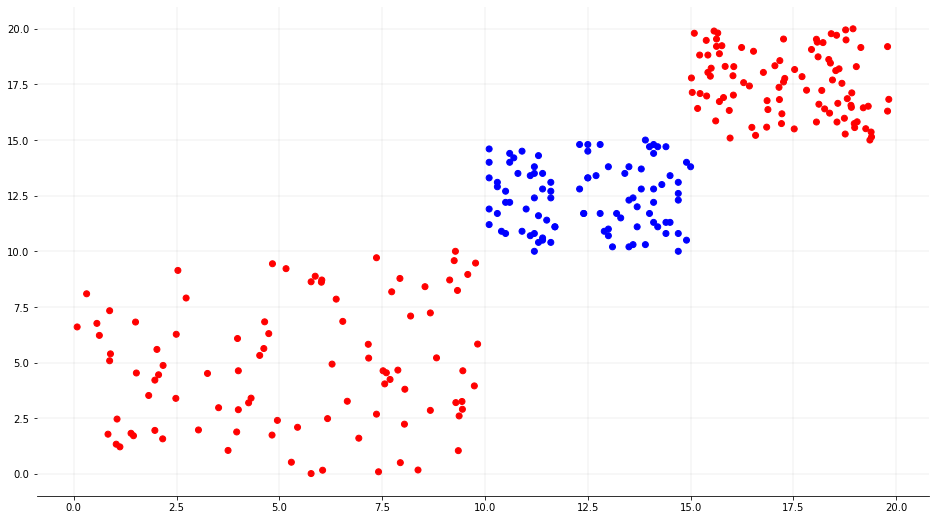

In [5]:
size = 100
zerox= [10,15]
zeroy= [10,15]
onex= [0,10 , 15,20 ]
oney= [0,10 , 15 ,20]
dataset = generate_random_dataset(size,zerox,zeroy,onex,oney)
features = dataset[['x', 'y']]
label = dataset['target']

test_size = int(np.round(size * 0.2, 0))

x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

fig, ax = plt.subplots(figsize=(16, 9))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
colors = y_train
colors = np.where(colors == 0, '#0000FF', '#ff0000')
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
plt.show()

Train SVM

In [6]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.7


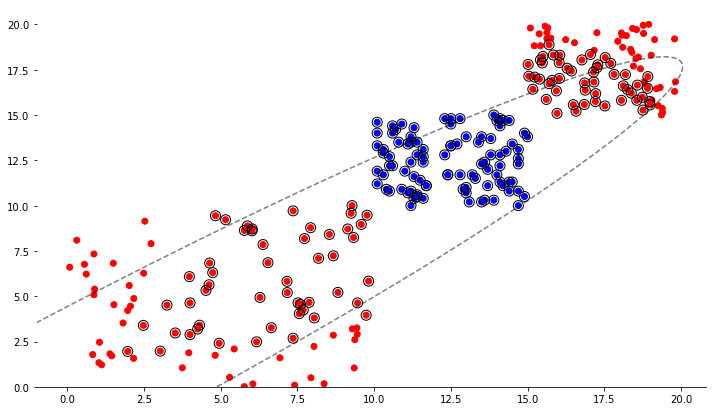

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])

colors = y_train
colors = np.where(colors == 1, '#FF0000', '#0000FF')

ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()